# Perceptron Algorithm Definition

In this module, I will implement the Perceptron algorithm, a supervised learning method for binary classification. It is one of the simplest types of artificial neural networks and operates by finding a linear decision boundary that separates data points into two classes. The algorithm proceeds as follows:

**(1) Initialization**

The algorithm begins by initializing the weight vector and bias term to zero (or small random values). These parameters define the separating hyperplane.

**(2) Prediction**

For each input sample, the algorithm computes the weighted sum of the input features and the bias. It then applies the unit step function to determine the predicted class label:

$$
\text{Prediction} =
\begin{cases}
1 & \text{if } (w \cdot x + b) \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

**(3) Update Rule**

If the prediction does not match the true label, the model updates its weights and bias to reduce future errors. The updates are given by:

$$
w \leftarrow w + \eta (y_i - \hat{y}_i) x_i
$$

$$
b \leftarrow b + \eta (y_i - \hat{y}_i)
$$

where:
- $w$ is the weight vector
- $b$ is the bias
- $\eta$ is the learning rate
- $y_i$ is the true label
- $\hat{y}_i$ is the predicted label
- $x_i$ is the input vector


**(4) Iteration**

The algorithm repeats the prediction and update steps over the training data for a fixed number of iterations or until the model converges (i.e., no further updates are needed).

The Perceptron algorithm is guaranteed to converge to a solution if the data is linearly separable. If the data is not linearly separable, the algorithm will continue updating without finding a perfect separating hyperplane.

---
## Advantages of the Perceptron Implementation

- **Simple and Easy to Understand:** The algorithm is easy to implement and intuitively demonstrates the concept of linear classifiers.
- **Fast to Train:** Due to its simplicity, the Perceptron converges quickly on linearly separable data.
- **Low Computational Cost:** It involves simple vector operations without expensive matrix inversions or complex computations.
- **Foundation for More Complex Models:** The Perceptron provides a fundamental basis for understanding more advanced algorithms like Support Vector Machines (SVMs) and neural networks.



## Disadvantages of the Perceptron Implementation

- **Only Works on Linearly Separable Data:** The basic Perceptron algorithm will not converge if the dataset is not linearly separable.
- **No Probability Outputs:** It only outputs hard class labels (0 or -1) without providing probability estimates or confidence scores.
- **Sensitive to Feature Scaling:** Without normalization, features with larger numerical ranges can dominate the learning process.
- **Limited Expressiveness:** The Perceptron can only create a linear decision boundary and cannot capture more complex, nonlinear relationships in the data.
- **No Regularization:** The basic implementation does not include mechanisms like L2 regularization to prevent overfitting.

---


## Dataset Description

The dataset used in this module is the **Breast Cancer Wisconsin (Diagnostic) Dataset**, obtained from the UCI Machine Learning Repository. It consists of **569** samples, each representing a breast tumor that has been classified as either **benign** or **malignant** based on features extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass.

Each sample is described by **30 real-valued features** that capture various characteristics of the cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, and symmetry.

For simplicity, we use the first two features, **mean radius** and **mean texture**, to visualize the data distribution and perform classification. The target labels are manually encoded as:
- **0** for benign tumors
- **-1** for malignant tumors

Before training, the dataset was **shuffled**, **split manually** into 80% training and 20% testing sets, and the features were **standardized** using z-score normalization.


In [35]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo

#Fetch Data
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and targets
X = breast_cancer_wisconsin_diagnostic.data.features.values  # convert to numpy array
y = breast_cancer_wisconsin_diagnostic.data.targets.values.squeeze()

X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [36]:
# Encode labels (B --> 0, M --> -1)
y = np.where(y == 'B', 0, -1)

# Shuffle and split
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Scale features (z-score normalization)
def manual_standardize(X, mean=None, std=None):
    if mean is None:
        mean = np.mean(X, axis=0)
    if std is None:
        std = np.std(X, axis=0)
    std[std == 0] = 1  # prevent division by zero
    return (X - mean) / std, mean, std

X_train, mean, std = manual_standardize(X_train)
X_test, _, _ = manual_standardize(X_test, mean, std)


In [37]:
# Perception Class Implementation
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        self.errors = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

                if update != 0:
                    errors += 1
            self.errors.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, -1)


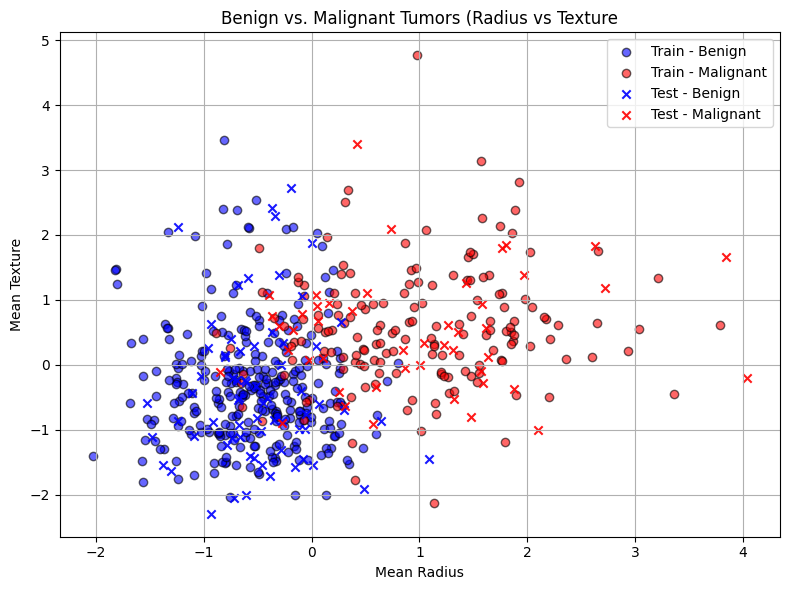

In [38]:
# Train and Plot Data Split
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)


# Plot benign vs malignant
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1],
            color='blue', label='Train - Benign', alpha=0.6, edgecolors='k')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1],
            color='red', label='Train - Malignant', alpha=0.6, edgecolors='k')

# Plot testing data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            color='blue', label='Test - Benign', alpha=0.9, marker='x')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1],
            color='red', label='Test - Malignant', alpha=0.9, marker='x')

# Labels and legend
plt.title("Benign vs. Malignant Tumors (Radius vs Texture")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


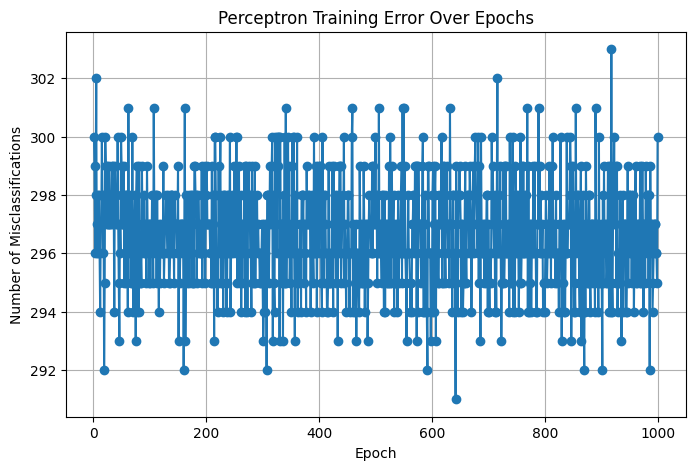

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.title("Perceptron Training Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Number of Misclassifications")
plt.grid(True)
plt.show()